# Hito 2 Mineria de datos (cc5205)


Integrantes:

*   Catalina Muñoz O.
*   Javier Andrews G.
*   Javier Venegas M.
*   Luciano Calvo
*   Ulises Faúndez Quinteros




# Indice

# Introduccion

# Limpieza de los datasets


Aqui se detalla el contenido de cada dataset, lo que representa cada columna y con cuales se va a realizar la investigacion.

### Dataset ```anime_cleaned.csv```
- ```anime_id```: Id único de cada anime del dataset.
- ```title```: Titulo original del anime.
- ```title_english```: Título en inglés.
- ```title_japanese```: Título en japonés.
- ```title_synonyms```: Otros títulos alternativos o sinónimos.
- ```image_url```: URL de una imagen del anime.
- ```type```: Tipo de anime (por ejemplo: TV, OVA, película, etc.).
- ```source```: Fuente original del anime (por ejemplo: manga, novela ligera, etc.).
- ```episodes```: Número total de episodios.
- ```status```: Estado del anime (por ejemplo: en emisión, finalizado, cancelado, etc.).
- ```airing```: Indica si el anime está en emisión.
- ```aired_string```: Fecha de emisión del anime en formato texto.
- ```aired```: Fecha de emisión del anime en formato fecha.
- ```duration```: Duración promedio de cada episodio.
- ```genre```: Géneros del anime.
- ```rating```: Clasificación de edad del anime.
- ```score```: Puntuación del anime dada por los usuarios del sitio MyAnimeList en escala 1 a 10.
- ```scored_by```: Cantidad de usuarios que han valorado el anime.
- ```rank```: Posición del anime en el ranking de popularidad de MyAnimeList.
- ```popularity```: Popularidad del anime según usuarios del sitio web MyAnimeList.
- ```members```: Cantidad de usuarios que agregaron el anime a su lista en MyAnimeList.
- ```favorites```: Cantidad de usuarios que agregaron al anime como favorito en MyAnimeList.
- ```background```: Información extra sobre el anime.
- ```premiered```: Fecha de estreno del anime en Japón.
- ```broadcast```: Día y horario de emisión del anime en Japón.
- ```related```: Información sobre otros animes relacionados con este.
- ```producer```: La productora del anime.

Realizando un analisis, hemos decidido eliminar las columnas: `image_url`, `background`, `related`, `premiered`, `broadcast`,`opening_theme`, `ending_theme`, `title_english`, `title_japanese`, `title_synonyms`,`airing`, `aired_string`.

Las columnas `image_url`, `background`, `related`, `opening_theme` y `ending_theme` aportan información que no estimamos relevante para un análisis general del anime. Dado que la imagen y datos extra no son informacion que caracterice escencialmente al anime que se estudia.

Las columnas `title_english`, `title_japanese` y `title_synonyms` son redudantes, pues todas expresan la misma informacion de distintas maneras, ademas, los animes no siempre tienen disponible su titulo en alguno de estos idiomas. Por la tanto, se opto por usar solamente el titulo original.

La columna `airing` tambien se va a omitir, pues esta informacion ya esta contenida en la columna `status`.
La columna `aired_string` tambien sera eliminada, pues esta información también se puede obtener en la columna `aired` con un formato de fecha mas comodo.


### Dataset `animelists_cleaned.csv`
- `username`: Nombre de usuario del usuario que registro la entrada para ese anime.
- `anime_id`: Id de cada anime en el dataset.
- `my_watched_episodes`: Cantidad de episodios que el usuario ha visto del anime.
- `my_start_date`: Fecha en que el usuario comenzó a ver el anime.
- `my_finish_date`: Fecha en que el usuario terminó de ver el anime.
- `my_score`: Puntuación que el usuario dio al anime (de 1 a 10).
- `my_status`: Estado actual del anime del usuario (en curso, completado, en espera, abandonado, etc.).
- `my_rewatching`: Indica si el usario esta volviendo a ver un anime completado (1 para sí, 0 para no).
- `my_rewatching_ep`: Cantidad de episodios que el usuario ha visto en su rewatch.
- `my_last_updated`: Fecha en que el usuario actualizó su registro de anime para este anime.
- `my_tags`: Etiquetas que el usuario ha asociado con este anime (por ejemplo, “acción”, “comedia”, “romance”, “favoritos”, etc.).


Realizando un análisis de este dataset se decidió eliminar las siguientes columnas: `my_start_date`, `my_finish_date`, `my_tags`, `my_last_updated`.

Se eliminó las columnas `my_start_date` y `my_finish_date` debido a que hay muchos datos nulos.

Se eliminó la columna `my_tags` debido a que ya está presente en otro dataset.

Se eliminó la columna `my_last_updated` debido a que no aporta información relevante para el estudio.

### Dataset ```users_cleaned.csv```
- `username`: Nombre de usuario del sitio web de anime.
- `user_id`: Id de cada usuario del sitio web de anime.
- `user_watching`: Cantidad de animes que el usuario está actualmente viendo.
- `user_completed`: Cantidad de animes que el usuario ha terminado de ver.
- `user_onhold`: Cantidad de animes que el usuario ha puesto en espera temporalmente.
- `user_dropped`: Cantidad de animes que el usuario ha abandonado antes de completar.
- `user_plantowatch`: Cantidad de animes que el usuario planea ver en un futuro.
- `user_days_spent_watching`: Cantidad de días que el usuario ha pasado viendo anime.
- `gender`: Género del usuario.
- `location:` La ubicación geográfica del usuario.
- `birth_date`: Fecha de nacimiento del usuario.
- `access_rank`: Nivel de acceso del usuario en el sitio web de anime.
- `join_date`: Fecha en que el usuario se registro al sitio web.
- `last_online`: Fecha y hora de la ultima conexion.
- `stats_mean_score`: Puntuación media otorgada por el usuario a los animes que ha visto.
- `stats_rewatched`: Cantidad de veces que el usuario ha vuelto a ver un anime ya visto.
- `stats_episodes`: Cantidad total de episodios de anime que el usuario ha visto.

Realizando un análisis se decidió eliminar las siguientes columnas `location`, `access_rank`.

La columna `location` se decidio eliminar debido a que estaba muy mal formateada, contenía valores sin sentido.

La columnna `access_rank` se eliminó debido a que no contiene data importante para el estudio.

# Exploracion de datos

Aqui se realiza la limpieza a nivel de codigo de lo mencionado anteriormente, se calculan las dimensiones de cada tabla, se filtran datos nulos en algunos casos y se muestran valores estadisticos para cada tabla.

In [177]:
#Importacion de librerias para el trabajo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seteamos que pandas imprima todas las columnas al mostrar un dataframe
pd.set_option('display.max_columns', None)

In [178]:
# importanción de anime y users, que son las tablas mas pequeñas
anime = pd.read_csv('anime_cleaned.csv')
users = pd.read_csv('users_cleaned.csv')

In [179]:
# este dataset lo importamos a parte, pues es muy grande (2GB aprox)
animelists = pd.read_csv('animelists_cleaned.csv')

### Tabla animelists

In [180]:
# ordenamos los usuarios por nombre alfabéticamente
animelists = animelists.sort_values(by='username')

# eliminamos usuarios sin nombre
animelists = animelists.dropna(subset=['username'])

# eliminamos las columnas que no usaremos
animelists = animelists.drop(columns=[
    'my_start_date', 'my_finish_date', 'my_tags', 'my_last_updated'
    ])

In [181]:
# mostramos las columnas de animelists luego de la limpieza
animelists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31283787 entries, 6740075 to 6085121
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_score             int64  
 4   my_status            int64  
 5   my_rewatching        float64
 6   my_rewatching_ep     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ GB


In [182]:
# mostramos características generales de animelists
animelists.describe()

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep
count,3.128379e+07,3.128379e+07,3.128379e+07,3.128379e+07,2.440557e+07,3.128379e+07
mean,1.170324e+04,1.289617e+01,4.652314e+00,3.008110e+00,7.903113e-04,1.833008e-01
std,1.134843e+04,3.733389e+01,3.931616e+00,1.730421e+00,2.810137e-02,1.009176e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.601000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,8.086000e+03,4.000000e+00,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,1.977500e+04,1.300000e+01,8.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
max,3.789600e+04,9.999000e+03,1.000000e+01,5.500000e+01,1.000000e+00,5.644513e+06


### Tabla anime

In [183]:
# eliminamos las columnas que no usaremos
anime = anime.drop(columns=[
    'image_url', 'background', 'related', 'premiered', 'broadcast',
    'opening_theme', 'ending_theme', 'title_english', 'title_japanese', 'title_synonyms',
    'airing', 'aired_string', 'licensor'
    ])

# mostramos las columnas de anime luego de la limpieza
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6668 entries, 0 to 6667
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         6668 non-null   int64  
 1   title            6668 non-null   object 
 2   type             6668 non-null   object 
 3   source           6668 non-null   object 
 4   episodes         6668 non-null   int64  
 5   status           6668 non-null   object 
 6   aired            6668 non-null   object 
 7   duration         6668 non-null   object 
 8   rating           6586 non-null   object 
 9   score            6668 non-null   float64
 10  scored_by        6668 non-null   int64  
 11  rank             6312 non-null   float64
 12  popularity       6668 non-null   int64  
 13  members          6668 non-null   int64  
 14  favorites        6668 non-null   int64  
 15  producer         4402 non-null   object 
 16  studio           6668 non-null   object 
 17  genre         

In [184]:
# mostramos características generales de anime
anime.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
count,6668.000000,6668.000000,6668.000000,6.668000e+03,6312.000000,6668.000000,6.668000e+03,6668.000000,6668.000000,6668.000000
mean,15064.977804,14.276395,6.848998,2.403501e+04,4327.645120,4479.515897,4.749037e+04,670.365627,28.442167,2006.915267
std,13161.364001,40.906929,0.927448,6.112103e+04,3170.699074,3453.338080,1.051211e+05,3823.072834,25.365980,10.381425
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.800000e+01,0.000000,0.000000,1942.000000
25%,2592.000000,1.000000,6.350000,6.812500e+02,1710.750000,1691.750000,2.222750e+03,3.000000,17.000000,2003.000000
50%,10401.500000,6.000000,6.930000,3.966000e+03,3754.500000,3629.500000,1.033650e+04,21.000000,24.000000,2010.000000
75%,30301.250000,13.000000,7.460000,1.976075e+04,6338.500000,6630.250000,4.336000e+04,142.000000,27.000000,2015.000000
max,37896.000000,1818.000000,9.520000,1.009477e+06,12856.000000,14468.000000,1.456378e+06,106895.000000,163.000000,2018.000000


### Tabla users

In [185]:
# eliminamos las columnas que no usaremos
users = users.drop(columns=["location", "access_rank"])

# generamos una nueva columna con la edad del usuario calculada con su fecha de nacimiento
users['age'] = 2018 - users['birth_date'].str[:4].astype(int)

# mostramos las columnas de users luego de la limpieza
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108711 entries, 0 to 108710
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  108710 non-null  object 
 1   user_id                   108711 non-null  int64  
 2   user_watching             108711 non-null  int64  
 3   user_completed            108711 non-null  int64  
 4   user_onhold               108711 non-null  int64  
 5   user_dropped              108711 non-null  int64  
 6   user_plantowatch          108711 non-null  int64  
 7   user_days_spent_watching  108711 non-null  float64
 8   gender                    108711 non-null  object 
 9   birth_date                108711 non-null  object 
 10  join_date                 108711 non-null  object 
 11  last_online               108711 non-null  object 
 12  stats_mean_score          108711 non-null  float64
 13  stats_rewatched           108711 non-null  f

In [186]:
# mostramos características generales de users
users.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes,age
count,1.087110e+05,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000,108711.000000
mean,1.817687e+06,14.767503,196.458178,11.388167,11.733716,75.578589,61.913873,7.747612,14.197993,3779.871255,25.125820
std,1.998269e+06,32.746591,244.945751,30.830825,30.978991,178.653664,59.211762,1.451368,55.376799,3678.336729,4.632399
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.500694,0.000000,0.000000,7.000000,10.000000
25%,1.994345e+05,3.000000,50.000000,0.000000,0.000000,6.000000,21.066319,7.330000,0.000000,1269.500000,22.000000
50%,5.675030e+05,7.000000,123.000000,4.000000,3.000000,27.000000,46.190278,7.890000,1.000000,2797.000000,25.000000
75%,3.477036e+06,16.000000,254.000000,12.000000,12.000000,81.000000,84.461806,8.460000,10.000000,5135.000000,28.000000
max,7.251737e+06,2934.000000,5479.000000,2562.000000,2457.000000,12051.000000,952.654595,10.000000,9404.000000,62347.000000,49.000000


# Consultas sobre el dataset

Procedemos ahora a realizar consultas que nos servirán de apoyo para las preguntas de investigación del proyecto.

### Consulta 1: 10 animes peores evaluados

Filtramos los 10 animes con peor calificación de la lista (distinta de 0), cuyos resultados representamos en un gráfico para estudiarlos mejor.

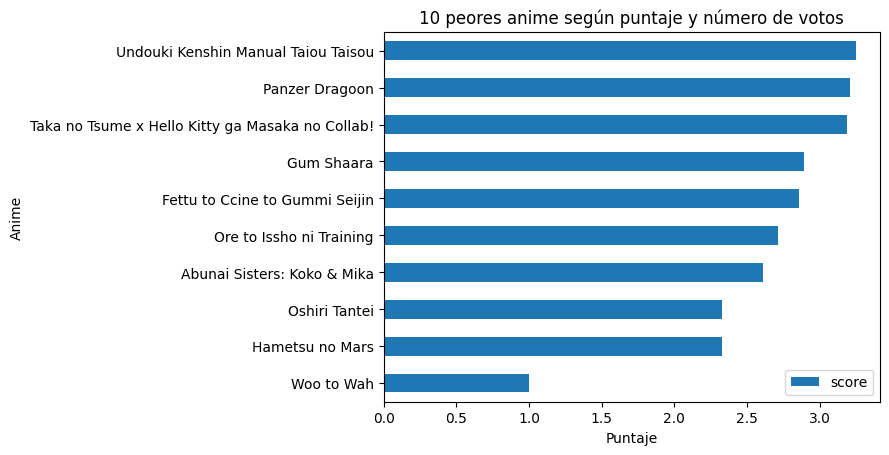

In [187]:
# Ordenamos el dataset según la popularidad:

anime1 = anime[['title','score','scored_by']]
anime1 = anime1[anime1['scored_by'] > 0]
anime_top_des = anime1.sort_values('score', ascending=True)
anime_top_des = anime_top_des.head(10) 

#Graficamos
anime_top_des.plot(x='title', y='score', kind='barh')
plt.title('10 peores anime según puntaje y número de votos')
plt.xlabel('Puntaje')
plt.ylabel('Anime')
plt.show()

Mencionamos también aquellos animes con un puntaje igual a 0, pues si bien puede que no hubiera interés en evaluarlos y por ello el resultado, también cabe la posibilidad de que el valor del puntaje sea a propósito. Por lo que vale la pena estudiarlo más adelante en caso de encontrar alguna similitud en sus características con aquellos animes del gráfico anterior.

In [188]:
anime1 = anime[['title','score','scored_by']]
anime1 = anime1[anime1['scored_by'] == 0]
anime_top_des = anime1.sort_values('score', ascending=True)
anime_top_des = anime_top_des.head(10) 

print(anime_top_des)

                                                  title  score  scored_by
6640     Inazuma Eleven Reloaded: Reformation of Soccer    0.0          0
6644    Free!: Take Your Marks: Character Butai Aisatsu    0.0          0
6648  Free! Movie 2: Timeless Medley - Yakusoku: Cha...    0.0          0
6652  Free! Movie 1: Timeless Medley - Kizuna: Chara...    0.0          0
6661                             Chikyuu to no Yakusoku    0.0          0
6664                        Wo Shi Jiang Xiaobai (2018)    0.0          0


### Consulta 2: Géneros de anime más y menos populares

Ordenamos en un gráfico 20 primero conjuntos de géneros de anime según su popularidad, los resultados los ordenaremos de más a menos populares. Esto nos puede ayudar a visualizar mejor la tendencia de los espectadores a la hora de escoger ver algo nuevo.

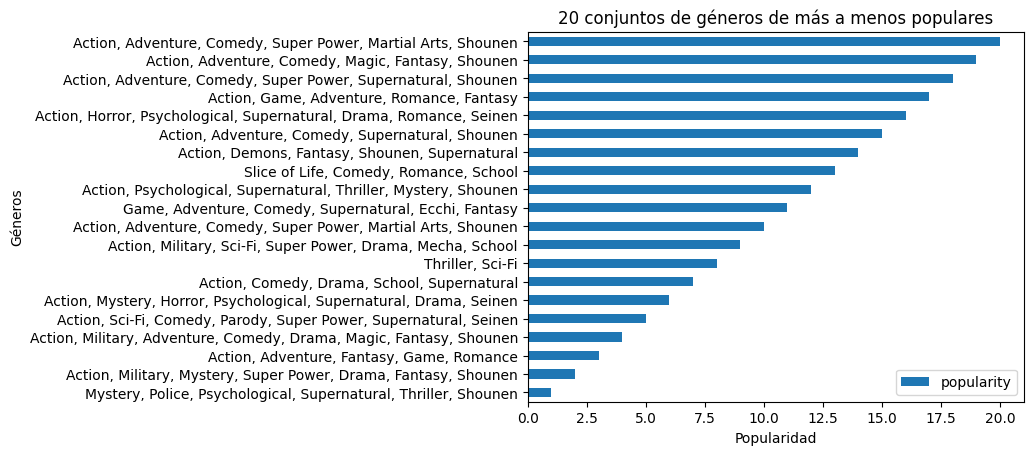

In [189]:

anime2 = anime[['title','genre','popularity']]
anime_top_des = anime2.sort_values('popularity', ascending=True)
anime_top_des = anime_top_des.head(20) 


#Graficamos
anime_top_des.plot(x='genre', y='popularity', kind='barh')
plt.title('20 conjuntos de géneros de más a menos populares')
plt.xlabel('Popularidad')
plt.ylabel('Géneros')
plt.show()

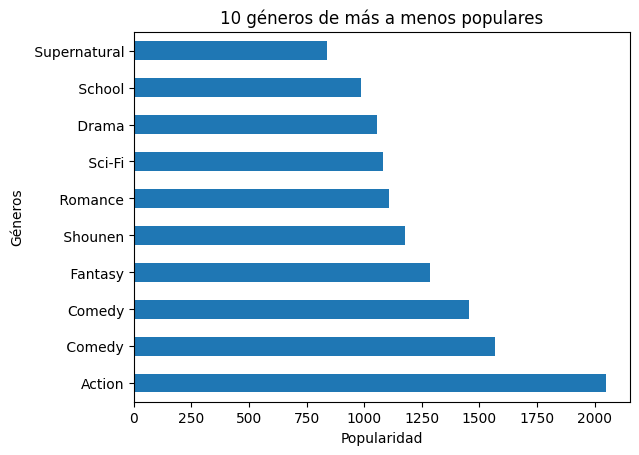

In [190]:
anime3 = anime[['title', 'genre', 'popularity']]

value_counts = anime3['genre'].str.split(',').explode().value_counts()

top_10_genres = value_counts.head(10)

plt.title('10 géneros de más a menos populares')
top_10_genres.plot(x='genre', y='popularity', kind='barh')
plt.xlabel('Popularidad')
plt.ylabel('Géneros')
plt.show()

### Consulta 3: Animes más abandonados

Ahora buscamos los animes que tienden a ser abandonados, esto con el objetivo de servir de apoyo para futuras preguntas de investigación. Para esto vamos a verificar si existe alguna relación entre los 20 animes más abandonados y los 3 conjuntos de géneros menos populares del gráfico de la consulta anterior. 

In [191]:
#Data frame con animes más abandonados

anime_dropped = animelists[['anime_id', 'my_status']] #proyeccion sobre datos significativos
anime_dropped = anime_dropped[anime_dropped['my_status'] == 4] #Dejamos solo los abandonados
count_dropped = anime_dropped['anime_id'].value_counts(dropna=True, sort=True) #Contamos las repeticiones del id
count_dropped = count_dropped.rename_axis('anime_id').to_frame('counts') #Convertimos en un dataframe
anime_names = anime[['title','anime_id','score','genre', 'episodes']]
count_dropped = count_dropped.merge(anime_names, on='anime_id', how='inner') #Obtenemos los nombres a partir del id
count_dropped.head(20) # Tomamos los primeros 20

,anime_id,counts,title,score,genre,episodes
0,269,11807,Bleach,7.90,"Action, Adventure, Comedy, Super Power, Supern...",366
1,1735,9424,Naruto: Shippuuden,8.18,"Action, Adventure, Comedy, Super Power, Martia...",500
2,20,7247,Naruto,7.88,"Action, Adventure, Comedy, Super Power, Martia...",220
3,21,6696,One Piece,8.54,"Action, Adventure, Comedy, Super Power, Drama,...",0
4,6702,6094,Fairy Tail,8.08,"Action, Adventure, Comedy, Magic, Fantasy, Sho...",175
5,527,4120,Pokemon,7.42,"Action, Adventure, Comedy, Kids, Fantasy",276
6,249,3748,InuYasha,7.90,"Action, Adventure, Comedy, Historical, Demons,...",167
7,1887,3371,Lucky☆Star,7.83,"Slice of Life, Comedy, Parody, School",24
8,1482,3199,D.Gray-man,8.16,"Action, Adventure, Comedy, Super Power, Demons...",103
9,3588,3127,Soul Eater,8.03,"Action, Fantasy, Comedy, Supernatural, Shounen",51


Podemos observar que de estos resultados solo 2 de estos animes coinciden con los géneros menos populares vistos anteriormente. Por lo que concluimos no hay relación entre el género de un anime con el hecho de si serán abandonados o no por los espectadores.

### Consulta 4: 100 estudios menos populares.

Buscamos ahora los 100 animes menos populares y buscamos los estudios de animación japonesa que más se repitan entre ellos. 

Aquí veremos cuales estudios producen los animes menos populares, lo cual nos podría ayudar a identificar patrones que nos servirán a furutos análisis.

Text(0, 0.5, 'Estudio')

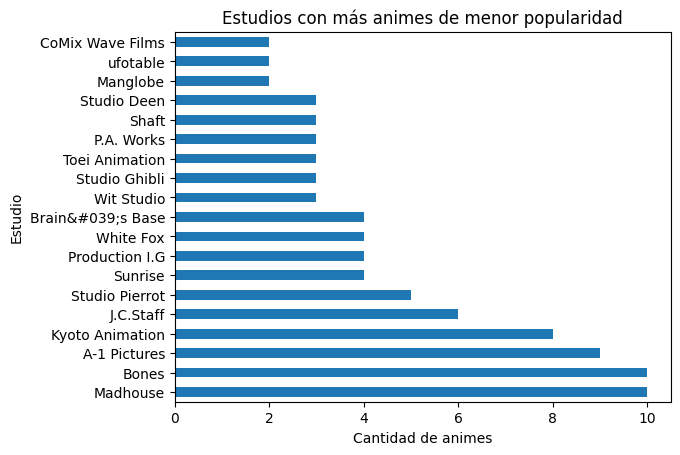

In [192]:
# Buscamos los estudios de los 100 animes menos populares

anime = anime.sort_values('popularity', ascending=True)
anime_top100 = anime.head(100)
anime_top100 = anime_top100['studio'].value_counts()
anime_top100[anime_top100 > 1].plot(kind='barh')

# Gráfico de los estudios con más animes de menor popularidad

plt.title('Estudios con más animes de menor popularidad')
plt.xlabel('Cantidad de animes')
plt.ylabel('Estudio')

# Preguntas y problemas

Nos planteamos variadas preguntas inspiradas en las consultas ya realizadas:

1. ¿Es posible predecir la edad de la audiencia de un anime respecto a los géneros a los que este pertenece (y viceversa)?

Esta pregunta fue modificada desde el Hito 1, ya que por la forma en que estaba planteada, se podía responder usando conteo. Sin embargo, ahora la pregunta va más allá de simplemente sumar datos, ya que plantea la idea de crear un modelo al cual si se le entrega una lista de géneros sea capaz de entregar la edad estimada del usuario con una buena precisión. 
De funcionar, este modelo nos podría ayudar a predecir qué tipo de anime puede preferir una cierta audiencia, lo cual nos sirve como apoyo para determinar si un anime podría llegar a fracasar en el mercado.

2. ¿Tiene alguna influencia la ubicación geográfica en la popularidad de un género?

Esta pregunta nos podría ayudar a entender mejor las preferencias de los usuarios según las características del mismo y, tal vez, un factor cultural relacionado con la ubicación geográfica. Pues, por ejemplo, un anime altamente religioso en su trama puede ser un éxito en ciertos países que comparten la fe y a la vez ser un total fracaso en otros con una población más bien atea.

3. ¿Tiene relación la cantidad de episodios de un anime con su popularidad?

Es curioso que animes con tantos episodios, como por ejemplo One Piece o Naruto, sean tan populares hoy en día cuando otras veces mientras más se extiende la trama, peor se vuelve y termina abandonado por la audiencia. Por lo que es interesante estudiar si la cantidad de episodios puede influir en la fidelidad de los espectadores o no.

4. ¿Podemos encontrar algún patrón con el cual identificar si un anime tiene más probabilidad de fracaso que otros? 

Es decir, el objetivo es identificar si es más probable que dejen de ver cierto anime en base a sus características. Este terminará siendo el foco de nuestro proyecto, de lo cual nos apoyaremos tanto de las consultas realizadas como de las demás preguntas de investigación ya planteadas.

# Método Experimental por preguntas

1. Para responder esta pregunta podemos crear un modelo de clasificación respecto a los datos que tenemos. Primero, debemos hacer una tabla respecto a los géneros de los anime que ha visto cada usuario, junto con su edad. Para esto, debemos hacer un doble join de la tabla users, la tabla de animes y la tabla animelist para obtener los animes que han sido vistos por los usuarios, junto a su edad y genero del anime. Luego, se dropean los demás atributos, dejando solo el género respecto a la edad.

Finalmente, se puede entrenar distintos modelos lineares de clasificación, y ver si efectivamente se puede predecir la audiencia objetivo de un anime respecto a los géneros que posee. También está la posibilidad de que no se relacionen tan profundamente, por lo que se medirá el accuracy de los modelos.

2. Para esta pregunta, se crearía una tabla respecto a los generos de los anime que ha visto cada usuario, pero esta vez junto a su país. Estos datos entrenarían el modelo

3. Trabajaríamos con la tabla de anime

4. Primeramente, el fracaso puede ser considerado de dos maneras. Que la serie sea poco conocida (y por ende, no se vendió tanto), o que la serie tiene un score bajo/drop alto.

Podríamos intentar crear una matriz de correlación entre estos atributos, para encontrar algún patrón.

De querer entrenar un modelo que prediga la popularidad de la series, el modelo se entrenaría en el conjunto de entrada con todos los datos posibles del anime, contando episodios, genero, etc. Sin embargo, para el conjunto de salida, se puede utilizar tanto el score del anime/cantidad de usuarios que lo dropearon, como la cantidad de usuarios que lo han visto (que siendo baja, implicaría que el anime fue un fracaso)

# Propuesta experimental

# Respondiendo la pregunta 1 usando el Método Experimental

Se necesita entrenar un modelo que deduzca el rango de edad respecto a los géneros de un animé. Para esto, en el entrenamiento del modelo se usará la animelist. Sin embargo, también se necesita la edad del usuario y el género del anime, por lo que se hará un join entre tablas.

## Preparación de los datos
Solo se necesita una tabla que junte el género de los animes y la edad del usuario que la vio. 
- Primero, se junta la tabla de usuarios, junto con su edad, a los animé que ha visto mediante un join
- Luego, se une el resultado con el anime, junto con su genero mediante un join.
- Finalmente se añadie una etiqueta con un rango de etario, ya que el utilizar la edad hará mucho menos efectivo el modelo.

In [225]:
from sklearn.preprocessing import MultiLabelBinarizer
## Creación de la tabla
# Join de edad con anime
joinAgeAnime = pd.merge(users[['username','age']], animelists[['username','anime_id']], on = 'username')
# Join de edad con genero
joinAgeGenre = pd.merge(joinAgeAnime, anime[['anime_id', 'genre']], on = 'anime_id')[['genre','age']]
dfAgeGenre = joinAgeGenre.dropna(subset=['genre'])

bins = [10, 17, 24, 31, 38, 45, 52]  # límites de los rangos
labels = ['10-17', '18-24', '25-31', '32-38', '39-45', '46-52']  # etiquetas para cada rango

dfAgeGenre['age_range'] = pd.cut(dfAgeGenre['age'], bins=bins, labels=labels, right=False) # etiquetado

C:\Users\ulise\AppData\Local\Temp\ipykernel_1156\3016477911.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAgeGenre['age_range'] = pd.cut(dfAgeGenre['age'], bins=bins, labels=labels, right=False) # etiquetado


### Subsampling
Se hace subsampling de los datos, ya que los la cantidad de usuarios respecto a los rangos etarios difieren enormemente.

In [226]:
## Subsampling
s1 = dfAgeGenre[dfAgeGenre['age_range'] == '10-17'].sample(72543)
s2 = dfAgeGenre[dfAgeGenre['age_range'] == '18-24'].sample(72543)
s3 = dfAgeGenre[dfAgeGenre['age_range'] == '25-31'].sample(72543)
s4 = dfAgeGenre[dfAgeGenre['age_range'] == '32-38'].sample(72543)
s5 = dfAgeGenre[dfAgeGenre['age_range'] == '39-45'].sample(72543)
s6 = dfAgeGenre[dfAgeGenre['age_range'] == '46-52']
dfAgeGenreSampled = pd.concat([s1, s2, s3, s4, s5, s6])

dfAgeGenreSampled['age_range'].value_counts()

age_range
10-17    72543
18-24    72543
25-31    72543
32-38    72543
39-45    72543
46-52    72543
Name: count, dtype: int64

### Extracción de datos de entrenamiento

- Se dividen los datos en un 70% para el entrenamiento del modelo, y otro 30% para los test
- Ya que los generos están empaquetados en una lista, se utiliza count vectorizer para crear los conjuntos

#### Separación de datos para clasificación (predecir edad según los géneros)

In [ ]:
## Extracción de datos
from sklearn.model_selection import train_test_split

# Reemplaza countVectorizer
## Ya que los generos están empaquetados en un string, se pasan a una lista
dfAgeGenreSampled['genre'] = dfAgeGenreSampled['genre'].str.split(', ')

## Luego se aplica MultiLabelBinarizer para obtener columnas binarias de cada género

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(dfAgeGenreSampled['genre']), columns=mlb.classes_, index=dfAgeGenreSampled.index)

dfAgeGenreSampled = pd.concat([dfAgeGenreSampled.drop('genre', axis=1), genre_encoded], axis=1)


X = dfAgeGenreSampled.drop(columns=['age_range', 'age'])
y = dfAgeGenreSampled['age_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

dfAgeGenreSampled

,age,age_range,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
5058436,16,10-17,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
25924751,16,10-17,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2084852,14,10-17,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10644490,15,10-17,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
395567,14,10-17,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31219514,49,46-52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31219515,49,46-52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31219516,49,46-52,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
31219517,49,46-52,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Separación de datos para clasificación inversa (predecir géneros según la edad)

In [228]:
# Función para convertir el rango de edad a su valor medio
def age_range_to_mid(age_range):
    start, end = map(int, age_range.split('-'))
    return (start + end) / 2

# Aplicar la función a la columna 'age'
dfAgeGenre['age_range'] = dfAgeGenre['age_range'].apply(age_range_to_mid)

# Se toma una muestra de los datos para optimizar el tiempo de entrenamiento del clasificador
dfAgeGenre = dfAgeGenre.sample(frac=0.1, random_state=42)

# Se transforman los géneros en listas
dfAgeGenre['genre'] = dfAgeGenre['genre'].str.split(', ')

# Se aplica MultiLabelBinarizer para obtener columnas binarias para cada género
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(dfAgeGenre['genre']), columns=mlb.classes_, index=dfAgeGenre.index)

# Se une la codificación con el DataFrame original
dfAgeGenre = pd.concat([dfAgeGenre.drop('genre', axis=1), genre_encoded], axis=1)


X2 = dfAgeGenre[['age_range']]
y2 = dfAgeGenre[mlb.classes_]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42, stratify=X2)


C:\Users\ulise\AppData\Local\Temp\ipykernel_1156\3963541839.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfAgeGenre['age_range'] = dfAgeGenre['age_range'].apply(age_range_to_mid)


## Modelos de entrenamiento

- Logistic Regression
- Naive Bayes Multinomial
- KNN
- Random Forest
- One vs Rest con Random Forest (para hacer la predicción inversa)
- Dummy clasifier
para corroborar si los otros dos modelos superan

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

bayes = MultinomialNB()
bayes.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=150, max_depth=30, random_state=42)
rf.fit(X_train, y_train)

dummy = DummyClassifier()
dummy.fit(X_train, y_train)

DummyClassifier()

KNN

In [229]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(3, 21)}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
best_k = grid_search.best_params_['nneighbors']
best_score = grid_search.best_score_

print(f'Best k: {best_k}')
print(f'Best cross-validation accuracy: {best_score}')

best_knn = grid_search.best_estimator_

In [217]:
ovr = OneVsRestClassifier(RandomForestClassifier(random_state=42, max_depth=8, class_weight='balanced'))
ovr.fit(X_train2, y_train2)

OneVsRestClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                     max_depth=8,
                                                     random_state=42))

### Precisión de dummy classifier

In [ ]:
y_predicho = dummy.predict(X_test)
print(classification_report(y_test, y_predicho))

c:\Users\ulise\Repositorios\grupo5mineria\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ulise\Repositorios\grupo5mineria\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       10-17       0.17      1.00      0.29     21763
       18-24       0.00      0.00      0.00     21763
       25-31       0.00      0.00      0.00     21763
       32-38       0.00      0.00      0.00     21763
       39-45       0.00      0.00      0.00     21763
       46-52       0.00      0.00      0.00     21763

    accuracy                           0.17    130578
   macro avg       0.03      0.17      0.05    130578
weighted avg       0.03      0.17      0.05    130578



c:\Users\ulise\Repositorios\grupo5mineria\venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Precisión de Logistic Regression

In [ ]:
y_predicho = lr.predict(X_test)
print(classification_report(y_test, y_predicho))

              precision    recall  f1-score   support

       10-17       0.22      0.44      0.29     21763
       18-24       0.19      0.11      0.14     21763
       25-31       0.19      0.07      0.10     21763
       32-38       0.19      0.16      0.17     21763
       39-45       0.21      0.23      0.22     21763
         46+       0.20      0.22      0.21     21763

    accuracy                           0.21    130578
   macro avg       0.20      0.21      0.19    130578
weighted avg       0.20      0.21      0.19    130578



### Precisión de Naive Bayes

In [ ]:
y_predicho = bayes.predict(X_test)
print(classification_report(y_test, y_predicho))

              precision    recall  f1-score   support

       10-17       0.21      0.49      0.30     21763
       18-24       0.18      0.12      0.15     21763
       25-31       0.19      0.07      0.10     21763
       32-38       0.19      0.19      0.19     21763
       39-45       0.22      0.22      0.22     21763
         46+       0.21      0.14      0.16     21763

    accuracy                           0.20    130578
   macro avg       0.20      0.20      0.19    130578
weighted avg       0.20      0.20      0.19    130578



### Precisión de Random Forest

In [ ]:
y_predicho = rf.predict(X_test)
print(classification_report(y_test, y_predicho))

              precision    recall  f1-score   support

       10-17       0.29      0.48      0.36     21763
       18-24       0.22      0.22      0.22     21763
       25-31       0.20      0.18      0.19     21763
       32-38       0.23      0.22      0.22     21763
       39-45       0.24      0.20      0.22     21763
         46+       0.23      0.16      0.18     21763

    accuracy                           0.24    130578
   macro avg       0.23      0.24      0.23    130578
weighted avg       0.23      0.24      0.23    130578



### Precision de KNN

In [ ]:
y_predicho = knn.predict(X_test)
print(classification_report(y_test, y_predicho))

### Precisión de One vs Rest con Random Forest

In [218]:
y_predicho = ovr.predict(X_test2)

ovr_accuracy = accuracy_score(y_test2, y_predicho)
print(classification_report(y_test2, y_predicho, target_names=mlb.classes_))

               precision    recall  f1-score   support

       Action       0.41      0.62      0.50    385319
    Adventure       0.22      0.66      0.33    193413
         Cars       0.00      0.68      0.01      2554
       Comedy       0.50      0.88      0.64    464125
     Dementia       0.01      0.66      0.02     11094
       Demons       0.05      0.39      0.08     41585
        Drama       0.30      0.64      0.41    270173
        Ecchi       0.12      0.39      0.19    112403
      Fantasy       0.26      0.38      0.31    238967
         Game       0.03      0.44      0.06     26531
        Harem       0.09      0.40      0.15     81184
       Hentai       0.01      0.68      0.02      8379
   Historical       0.06      0.66      0.11     53995
       Horror       0.06      0.13      0.08     51146
        Josei       0.01      0.65      0.03     13261
         Kids       0.02      0.56      0.03     13831
        Magic       0.11      0.63      0.18     98915
 Martial 

# Resultados


#### Podemos hacer algunas consultas a los modelos, como que tipo de público atraería un anime de genero:
- Musica, Comedia
- Militar, Samurai, Historia
- Escuela, Niños, Demencia

In [219]:
testEpisodes = {'Action': [0, 0, 0], 'Adventure': [0, 0, 0], 'Cars': [0, 0, 0], 'Comedy': [1, 0, 0], 'Dementia': [0, 0, 1], 'Demons': [0, 0, 0], 'Drama': [0, 0, 0],
       'Ecchi': [0, 0, 0], 'Fantasy': [0, 0, 0], 'Game': [0, 0, 0], 'Harem': [0, 0, 0], 'Hentai': [0, 0, 0], 'Historical': [0, 1, 0], 'Horror': [0, 0, 0],
       'Josei': [0, 0, 0], 'Kids': [0, 0, 1], 'Magic': [0, 0, 0], 'Martial Arts': [0, 0, 0], 'Mecha': [0, 0, 0], 'Military': [0, 1, 0], 'Music': [1, 0, 0],
       'Mystery': [0, 0, 0], 'Parody': [0, 0, 0], 'Police': [0, 0, 0], 'Psychological': [0, 0, 0], 'Romance': [0, 0, 0], 'Samurai': [0, 1, 0],
       'School': [0, 0, 1], 'Sci-Fi': [0, 0, 0], 'Seinen': [0, 0, 0], 'Shoujo': [0, 0, 0], 'Shoujo Ai': [0, 0, 0], 'Shounen': [0, 0, 0],
       'Shounen Ai': [0, 0, 0], 'Slice of Life': [0, 0, 0], 'Space': [0, 0, 0], 'Sports': [0, 0, 0], 'Super Power': [0, 0, 0],
       'Supernatural': [0, 0, 0], 'Thriller': [0, 0, 0], 'Vampire': [0, 0, 0], 'Yaoi': [0, 0, 0], 'Yuri': [0, 0, 0]}
prueba = pd.DataFrame(data=testEpisodes)

pBayes = bayes.predict(prueba)
pRandomForest = rf.predict(prueba)
pLogisticRegression = lr.predict(prueba)
print(f"Edad de la audiencia a la que le gustará un anime de música y comedia es: {pBayes[0]} según bayes, {pRandomForest[0]} según RandomForest y {pLogisticRegression[0]} según LogisticRegression")
print(f"Edad de la audiencia a la que le gustará un anime de historia, militares y samurais es: {pBayes[1]} según bayes, {pRandomForest[1]} según RandomForest y {pLogisticRegression[1]} según LogisticRegression")
print(f"Edad de la audiencia a la que le gustará un anime de escuela, niños y demencia es: {pBayes[2]} según bayes, {pRandomForest[2]} según RandomForest y {pLogisticRegression[2]} según LogisticRegression")

Edad de la audiencia a la que le gustará un anime de música y comedia es: 10-17 según bayes, 10-17 según RandomForest y 10-17 según LogisticRegression
Edad de la audiencia a la que le gustará un anime de historia, militares y samurais es: 39-45 según bayes, 39-45 según RandomForest y 39-45 según LogisticRegression
Edad de la audiencia a la que le gustará un anime de escuela, niños y demencia es: 25-31 según bayes, 46-52 según RandomForest y 10-17 según LogisticRegression


#### También podemos consultar con que probabilidad prefiere la gente de cierto rango etario los distintos géneros
- 10-17
- 25-31
- 45-52

In [ ]:
ex1 = pd.DataFrame({'age_range': [17]})  # 10-17
ex2 = pd.DataFrame({'age_range': [30]})  # 25-31
ex3 = pd.DataFrame({'age_range': [51]})  # 45-52
proba1 = ovr.predict_proba(ex1)
proba2 = ovr.predict_proba(ex2)
proba3 = ovr.predict_proba(ex3)
probabilities1 = dict(zip(mlb.classes_, proba1[0]))
probabilities2 = dict(zip(mlb.classes_, proba2[0]))
probabilities3 = dict(zip(mlb.classes_, proba3[0]))

In [ ]:
for genre, prob in probabilities1.items():
    print(f"Rango: 10-17,Género: {genre}, Probabilidad: {prob}")

In [ ]:
for genre, prob in probabilities2.items():
    print(f"Rango: 25-31,Género: {genre}, Probabilidad: {prob}")

In [ ]:
for genre, prob in probabilities3.items():
    print(f"Rango: 45-52,Género: {genre}, Probabilidad: {prob}")

# Conclusión

In [223]:
anime[anime["genre"] == "Dementia"][anime["aired_from_year"] >= 2000]

C:\Users\ulise\AppData\Local\Temp\ipykernel_1156\3221859241.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anime[anime["genre"] == "Dementia"][anime["aired_from_year"] >= 2000]


,anime_id,title,type,source,episodes,status,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,producer,studio,genre,duration_min,aired_from_year
4271,25971,Angel (Special),Special,Original,1,Finished Airing,"{'from': None, 'to': None}",6 min.,G - All Ages,5.60,84,8186.0,10921,230,2,NaN,RG Animation Studios,Dementia,6.0,2001.0
3065,35450,Five Fire Fish,Movie,Original,1,Finished Airing,"{'from': None, 'to': None}",1 min.,G - All Ages,4.79,61,9214.0,12214,137,0,NaN,"Yamamura Animation, Inc.",Dementia,1.0,2013.0
3684,34851,Kaibutsu Gakushou,Movie,Original,1,Finished Airing,"{'from': None, 'to': None}",6 min.,G - All Ages,5.67,9,10696.0,12669,115,0,NaN,"Yamamura Animation, Inc.",Dementia,6.0,2016.0
4146,34849,Konohana no Sakuya Mori,Movie,Original,1,Finished Airing,"{'from': None, 'to': None}",11 min.,G - All Ages,5.60,47,10964.0,12671,115,0,NaN,Tomoyasu Murata Company,Dementia,11.0,2014.0


La precisión de todos los modelos es pésima, lo que nos lleva a pensar que no existe una relación tan fuerte entre los generos de un anime y la edad de la audiencia que los consume.

# Contribucion de cada integrante
- Ulises Faúndez Q: Desarrollo de los modelos Naive Bayes y Logistic Regression para la resolición de la pregunta 1.